# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

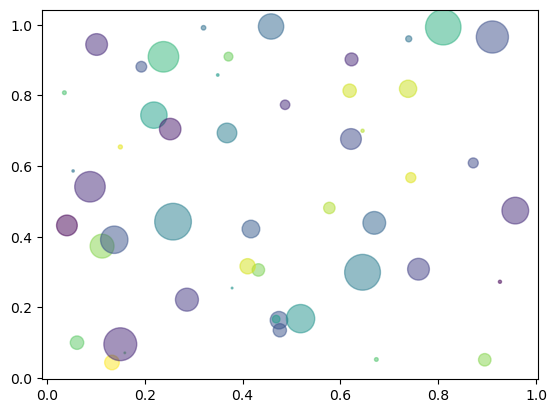

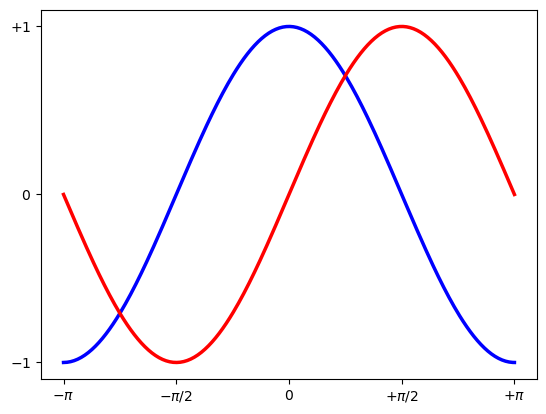

In [2]:
import numpy as np
import matplotlib.pyplot as plt
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-")

plt.xlim(X.min()*1.1, X.max()*1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
[r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.ylim(C.min()*1.1,C.max()*1.1)
plt.yticks([-1, 0, +1],
[r'$-1$', r'$0$', r'$+1$'])

plt.show()

In [3]:
import pandas as pd

import matplotlib.pyplot as plt

import os

import json

import math

import numpy as np
# List of things to import

root_dir = 'F:/My Drive/Polimi_magistrale/Thesis/Extension/run_by_Arthur/new_kratos/models'
folder_names = [f for f in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, f))]
#print(folder_names)
file_count = len(folder_names)
print('Model count :'+str(file_count))

csv_files=[]; problem_name_S=[]; water_pressure_S = []; constant_vertical_stress_S = [] ; constant_horizontal_stress_S = [] ; desired_contact_friction_angle_S = [] ; cone_radius_S = [] ; u2_initial_depth_S = [] ; velocity_S = []; time_step_S = []; distance_mesh_size_interior_S = []; distance_mesh_size_boundary_S = []; characteristic_length_S = []; non_local_variables_S = []

for sub_dir in folder_names:
    file_name = 'cone_penetration_data.csv'
    f=root_dir + '/' + sub_dir + '/' + file_name
    csv_files.append(f)                           #-> output string array containing path to csv_files
    
    #Importinfo from JSON file. Code generated through blackbox.ai by simply giving the JSON and asking to extract data :DDD
    # Step 1: Read the JSON file with
    file_name='ProjectParameters.json'
    f=root_dir + '/' + sub_dir + '/' + file_name
    with open(f, 'r') as file:
        Project_par = json.load(file)
    
    # Extract the problem name
    problem_name = Project_par['problem_data']['problem_name']
    print("Problem Name:", problem_name)
    problem_name_S.append(problem_name)
    # Extract the water pressure value
    
    for process in Project_par['constraints_process_list']:
        if process['process_module'] == 'SolidMechanicsApplication.assign_scalar_to_nodes_process':
            if process['Parameters']['variable_name'] == 'WATER_PRESSURE':
                water_pressure = -process['Parameters']['value']
                break
    
    print("Water Pressure:", water_pressure)
    water_pressure_S.append(water_pressure)
    # Extract the constant vertical stress and constant horizontal stress
    
    for process in Project_par['loads_process_list']:
        if process['process_module'] == 'SolidMechanicsApplication.assign_initial_HM_state_process':
            constant_vertical_stress = -process['Parameters']['constant_vertical_stress']
            constant_horizontal_stress = -process['Parameters']['constant_horizontal_stress']
            break
    
    print("Constant Vertical Stress:", constant_vertical_stress)
    print("Constant Horizontal Stress:", constant_horizontal_stress)
    constant_vertical_stress_S.append(constant_vertical_stress);constant_horizontal_stress_S.append(constant_horizontal_stress)
    # Extract the DESIRED_CONTACT_FRICTION_ANGLE
    
    for process in Project_par['problem_process_list']:
        if process['process_module'] == 'ContactMechanicsApplication.parametric_walls_process':
            for parametric_wall in process['Parameters']['parametric_walls']:
                if 'contact_options' in parametric_wall:
                    desired_contact_friction_angle = parametric_wall['contact_options']['friction_properties']['DESIRED_CONTACT_FRICTION_ANGLE']
                    break
            if desired_contact_friction_angle is not None:
                break
    
    print("Desired Contact Friction Angle:", desired_contact_friction_angle)
    desired_contact_friction_angle_S.append(desired_contact_friction_angle)
    # Extract the cone radius, u2 initial depth, and velocity

    for process in Project_par['problem_process_list']:
        if process['process_module'] == 'PfemApplication.cone_penetration_utility':
            cone_radius = process['Parameters']['cone_radius']
            u2_initial_depth = process['Parameters']['u2_initial_depth']
            velocity = process['Parameters']['velocity']
            break
    
    print("Cone Radius:", cone_radius)
    print("U2 Initial Depth:", u2_initial_depth)
    print("Velocity:", velocity)
    cone_radius_S.append(cone_radius);u2_initial_depth_S.append(u2_initial_depth);velocity_S.append(velocity)
    
    # Extract the time step, the refinement of the mesh-size, the characteristic-length and the variables transformed into their non-local value 
    
    time_step = Project_par['time_settings']['time_step']
    print("Time Step:", time_step)
    time_step_S.append(time_step)

    for process in Project_par['problem_process_list']:
        if process['process_module'] == 'MeshersApplication.remesh_domains_process':
            for domain in process['Parameters']['domains']:
                refine_options = domain['Parameters']['refine_options']
                distance_mesh_size_interior = refine_options['interior']['distance_mesh_size']
                distance_mesh_size_boundary = refine_options['boundary']['distance_mesh_size']
                break
    print("Distance Mesh Size (Interior):", distance_mesh_size_interior)
    print("Distance Mesh Size (Boundary):", distance_mesh_size_boundary)
    distance_mesh_size_interior_S.append(distance_mesh_size_interior)
    distance_mesh_size_boundary_S.append(distance_mesh_size_boundary)

    for process in Project_par['problem_process_list']:
        if process['process_module'] == 'ConstitutiveModelsApplication.non_local_plasticity_process':
            characteristic_length = process['Parameters']['characteristic_length']
            non_local_variables = process['Parameters']['non_local_variables']
            break
    print("Characteristic Length:", characteristic_length)
    print("Non-Local Variables:", non_local_variables)
    characteristic_length_S.append(characteristic_length)
    
 
# Create a dictionary to store the data from csv files
data = {}
# Import data from each CSV file
column_names=["z_R", "qnet", "fs", "du2","du1","du3"]
for file in csv_files:    
    df = pd.read_csv(file,names=column_names)
    data[file] = pd.DataFrame(df.values, columns=column_names)

# Modify and store in same variable type
time=[];u1=[];u2=[];qnet=[];fs=[]
count=0
data_int={}
for file, array in data.items():
    header=array.columns
    array=array.values
    time = array[:, 0]
    
    # Remove value from previous restart
    mask=[]
    for i in range(len(time)-1) :
        
        if time[i+1]<=time[i] :
            lim=time[i+1]
            #print(lim)
            j=i
            tmp=[]
            while time[j]>=lim and j>=0 :
                tmp.append(j)
                j=j-1
            tmp = np.array(tmp)
            mask=np.append(mask,tmp)
            mask=mask.astype(int)
            #print(mask)
    array=np.delete(array, mask, axis=0)
    #print(array)
    
    #Modify the data from the csv to get CPT output based on the project parameters
    time=array[:, 0]; qnet = array[:, 1] ; fs = array[:, 2]; du1 = array[:, 4]; du2 = array[:, 3] ; du3 = array[:, 5]# time in [s] Fc, Fs in [kN] 
    Ac=math.pi*cone_radius_S[count]*cone_radius_S[count] ; As=7.5*cone_radius_S[count]*2*math.pi*cone_radius_S[count]  # Ac: Area cone base [m2] As : Area of the sleeve [m2]
    u0=water_pressure_S[count];sv0=constant_vertical_stress_S[count]# stress [kPa]
    z_R=time*velocity_S[count]/cone_radius_S[count];qnet=-qnet/Ac-sv0-u0; fs=-fs/As; du2=du2-u0; du1=du1-u0
    array[:, 0]=z_R ; array[:, 1]=qnet; array[:, 2]=fs; array[:, 3]=du2; array[:, 4]=du1
    
    #Modify the data from the csv to get filtered CPT output based on the variability of qnet
    y_int = np.arange(z_R[0], z_R[-1], 0.002)
    x_int = np.interp(y_int, z_R, qnet)
    x_int = pd.Series(x_int)
    
    k = 55
    M=x_int.rolling(window=k).std()
    
    mask = M >= np.nanmean(x_int) / 25
    #print(mask)
    x_filt = x_int.copy()
    x_filt[mask] = np.nan
    x_filt_mean=x_filt.rolling(window=25).mean()
    x_filt=x_filt.values
    x_filt_mean=x_filt_mean.values
    
    tmp = np.empty((len(y_int), 5))
    for i, _ in enumerate(tmp.T):
        tmp[:,i] = np.interp(y_int, z_R, array[:,i+1])
    array=np.column_stack([y_int, tmp])
    #Append the two new filtered array of qnet 1)std deviation filter 2)smoothed with moving average
    array=np.column_stack([array, x_filt,x_filt_mean])
    #Fill data for each file with modified output
    header=np.append(header,['qnet_filt_dev','qnet_filt_dev_mean'])
    data_int[file]=pd.DataFrame(array, columns=header)
    true_z_R=pd.DataFrame(z_R, columns=['true_z_R'])
    data_int[file]=pd.concat([data_int[file],true_z_R], axis=1)
    #Update of the counter for the project parameters
    count=count+1
    

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'F:/My Drive/Polimi_magistrale/Thesis/Extension/run_by_Arthur/new_kratos/models'

In [ ]:
import pandas as pd

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Problem Name': problem_name_S,
    'Water Pressure': water_pressure_S,
    'Constant Vertical Stress': constant_vertical_stress_S,
    'Constant Horizontal Stress': constant_horizontal_stress_S,
    'Desired Contact Friction Angle': desired_contact_friction_angle_S,
    'Cone Radius': cone_radius_S,
    'U2 Initial Depth': u2_initial_depth_S,
    'Velocity': velocity_S,
    'Time Step': time_step_S,
    'Distance Mesh Size Interior': distance_mesh_size_interior_S,
    'Distance Mesh Size Boundary': distance_mesh_size_boundary_S,
    'Characteristic Length': characteristic_length_S
})

# Create a DataFrame from the data_int collection
data_int_df = pd.concat(data_int.values(), ignore_index=True)

# Create an Excel writer
with pd.ExcelWriter('summary.xlsx') as writer:
    # Write the summary DataFrame to the first tab
    summary_df.to_excel(writer, sheet_name='Summary', index=False)
    # Write the data_int DataFrame to the second tab
    data_int_df.to_excel(writer, sheet_name='Data', index=False)
    

In [ ]:
import matplotlib.pyplot as plt

count = 0
plot = 1
print_info = 1

# First subplot
if plot:
    for file, array in data_int.items():
        fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))
        # axs is a 2D array of axes, with shape (3, 2)
        # You can access each subplot using axs[i, j]
        # For example, axs[0, 0] is the top-left subplot

        if print_info:
            print("Problem Name:", problem_name_S[count])
            print("Water Pressure:", water_pressure_S[count])
            print("Constant Vertical Stress:", constant_vertical_stress_S[count])
            print("Constant Horizontal Stress:", constant_horizontal_stress_S[count])
            #print("Desired Contact Friction Angle:", desired_contact_friction_angle_S[count])
            #print("Cone Radius:", cone_radius_S[count])
            print("U2 Initial Depth:", u2_initial_depth_S[count])
            #print("Velocity:", velocity_S[count])
    
        #plot qnet
        axs[0,0].plot(array['z_R'], array['qnet'], label=array.columns[1])
        axs[0,0].plot(array['z_R'], array['qnet_filt_dev'], label=array.columns[6])
        axs[0,0].plot(array['z_R'], array['qnet_filt_dev_mean'], label=array.columns[7])
        axs[0,0].legend()
        axs[0,0].set_title(problem_name_S[count])
        axs[0,0].set_xlabel('Normalized penetration')
        axs[0,0].set_ylabel('qnet')
        axs[0,0].grid()
        
        # get time increments
        arr = (array['true_z_R']) * velocity_S[count] / cone_radius_S[count]
        arr = arr[~np.isnan(arr)]
        diff_arr = np.diff(arr)
        condition = diff_arr <= 0
        diff_arr = diff_arr[~condition]
        arr = arr[1:]
        arr = arr[~condition]
        if np.std(diff_arr) < 10e-6:
            axs[0,1].set_ylim(np.mean(diff_arr) - np.mean(diff_arr) / 2, np.mean(diff_arr) + np.mean(diff_arr) / 2) 
            
        #plot time increments
        axs[0,1].plot(arr, diff_arr, label='dz_R')
        axs[0,1].legend()
        axs[0,1].set_xlabel('Normalized penetration')
        axs[0,1].set_ylabel('dz_R')
        axs[0,1].grid()
        axs[0,1].ticklabel_format(axis='y', style='plain')
        
        #plot fs, du2,du1
        for i, ax in enumerate(axs.flat):
            if i < 2 or i > 4:
                continue
            ax.plot(array['z_R'],array[array.columns[i]],label=array.columns[i])  # plot something on each subplot
            ax.set_xlabel('Normalized penetration')
            ax.set_ylabel(array.columns[i+1])
            ax.grid()
        count = count + 1
        plt.show()